# Part 2 - Prosper Loan Dataset Explanatory Project

#### by Babatunde Akeredolu

### Investigation Overview

This is an explanatory analysis of Prosper Loan dataset. In this analysis, I look at the variables that were best in predicting a loan's outcome status and also the value of the loan.


### Dataset Overview

The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [31]:
# import all the necessary libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays and carrying out mathematical operations
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualizations

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
# data wrangling

loan_df = loan_data.copy() #create a copy of the dataset

#ProsperScore is within the range of 1-10
#I had to remove values that are not null and also outside the range
loan_df.drop(loan_df[loan_df['ProsperScore'] == 11 ].index, axis=0, inplace = True)

In [5]:
# select only the columns of interest
loan_df = loan_df.iloc[:, np.r_[4,5,7,8,12,15:20,25:27,35:37,42,46:50,51,53,59,63,67]]

### Distribution of ProsperScores

Majority of the loan's risk scores are average with 4, 5 and 6 being the risk scores associated with most loans. However, more than half of the loans are on the positive side of the risk scores.

In [7]:
# use blue as default colour

def_color = sns.color_palette()[0]

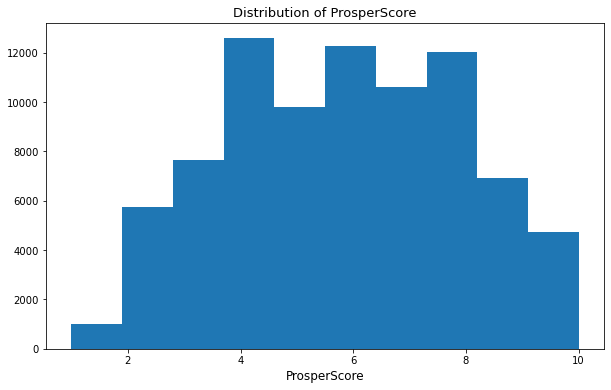

In [20]:
#distribution plot of ProsperScore

plt.figure(figsize = [10,6]) #set figure size
plt.hist(data = loan_df, x = 'ProsperScore', color = def_color, bins = 10) #set data, bins and color
plt.title('Distribution of ProsperScore', size = 13) # plot title
plt.xlabel('ProsperScore', size = 12) # x axis title
plt.show()

### Distribution of OnTimeProsperPayments

Most of the borrowers are on time payers as the number of on time payments are high, this can be seen in the distribution plot as most of the data are concentrated on the far left of the axis.

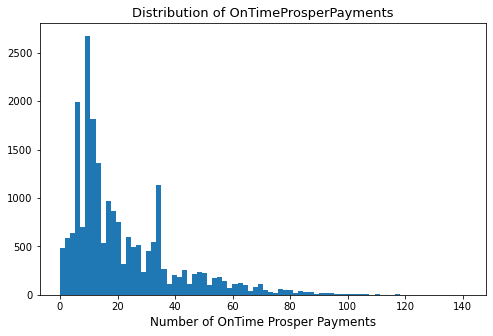

In [21]:
#distribution plot of OnTimeProsperPayments

plt.figure(figsize = [8,5]) #set figure size
plt.hist(data = loan_df, x = 'OnTimeProsperPayments', color = def_color, bins = 80) #set data, bins and color
plt.title('Distribution of OnTimeProsperPayments', size = 13) # plot title
plt.xlabel('Number of OnTime Prosper Payments', size = 12) # x axis title
plt.show()

### TotalProsperLoans & OnTimeProsperPayments

TotalProsperLoans and OnTimeProsperPayments are positively and highly correlated, the higher the OnTimeProsperPayments, the higher the number of loans that were taken.

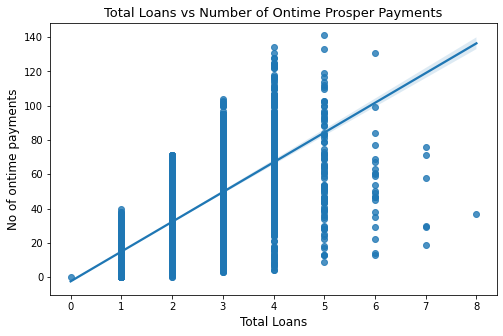

In [24]:
# regression plot

plt.figure(figsize = [8,5]) #set figure size
sns.regplot(data = loan_df, x = 'TotalProsperLoans', y = 'OnTimeProsperPayments' ) #data to plot
plt.xlabel('Total Loans', size = 12) # x_axis label and size
plt.ylabel('No of ontime payments', size = 12) # y-axis label and size
plt.title('Total Loans vs Number of Ontime Prosper Payments', size = 13)

plt.show()

### ProsperScore vs LoanStatus

ProsperScores are high for loans that are completed. For loans that are due, the ProsperScores are quite low.

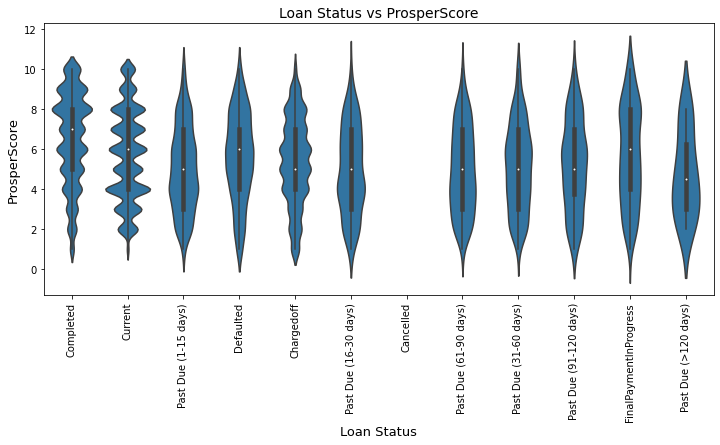

In [26]:
plt.figure(figsize = [12,5]) # set figure size

# set data, color and order of arrangements
sns.violinplot(data = loan_df, x = 'LoanStatus', y= 'ProsperScore', color= def_color)
plt.xlabel('Loan Status', size = 13) # x_axis label and size
plt.ylabel('ProsperScore', size = 13) # y-axis label and size
plt.title('Loan Status vs ProsperScore', size = 14)
plt.xticks(rotation = 90) # xlabel rotation

plt.show()

### IncomeRange vs LoanOriginalAmount

With few exceptions (Not employed and zero income earners), as income of borrowers increases, the higher the amount of loans they take.

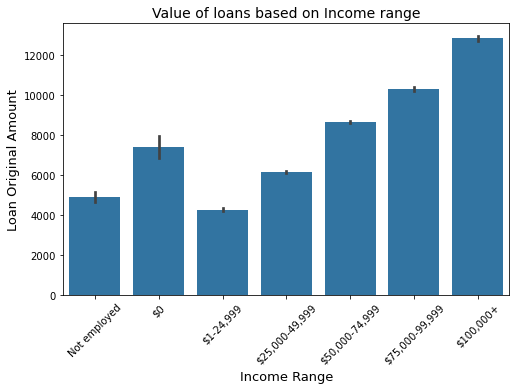

In [28]:
# display order of the IncomeRange Variable
categories=['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
            '$75,000-99,999', '$100,000+']

plt.figure(figsize = [8,5]) # set figure size

# set data, color and order of arrangements
sns.barplot(data = loan_df[loan_df['IncomeRange'] != 'Not Available'], 
            x = 'IncomeRange', y= 'LoanOriginalAmount', color= def_color, order = categories)
plt.xlabel('Income Range', size = 13) # x_axis label and size
plt.ylabel('Loan Original Amount', size = 13) # y-axis label and size
plt.title('Value of loans based on Income range', size = 14)
plt.xticks(rotation = 45) # xlabel rotation
plt.show()

### IncomeRange vs LoanOriginalAmount vs Term

The three variables - IncomeRange, LoanOriginalAmount and Term - have quite an interesting relationships, as Loan increases, Income Range increases as well as the term of the loan, this means that high income earners take high amount of loans with longer period of time. The only exception is for the first two categories (Not employed and zero income earners).

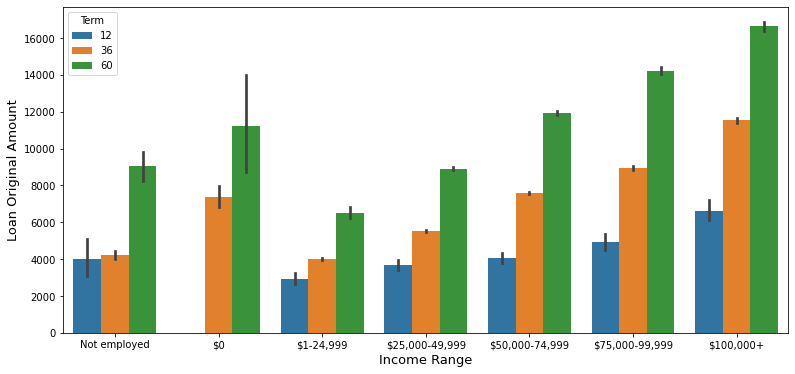

In [16]:
# display order of the IncomeRange Variable
categories=['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
            '$75,000-99,999', '$100,000+']

plt.figure(figsize = [13,6]) # set figure size

# set data, color and order of arrangements
sns.barplot(data = loan_df[loan_df['IncomeRange'] != 'Not Available'], 
            x = 'IncomeRange', y= 'LoanOriginalAmount', hue= 'Term', 
            order = categories)
plt.xlabel('Income Range', size = 13) # x_axis label and size
plt.ylabel('Loan Original Amount', size = 13) # y-axis label and size

plt.show()

In [2]:
!jupyter nbconvert Prosper_Loan_Visualization_project_Part_2.ipynb --to slides --post serve --no-input --no-prompt

^C
